
For comparison, also create an equivalent dataset by concatenating
784 all-zeros dimensions. Our concatenation of meaningless features does not at all
affect the information content of the data: we’re only adding something.

 Adding white noise channels or all-zeros channels to MNIST

In [2]:
from tensorflow.keras.datasets import mnist
import numpy as np
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
train_images_with_noise_channels = np.concatenate(
  [train_images, np.random.random((len(train_images), 784))], axis=1)
train_images_with_zeros_channels = np.concatenate(
  [train_images, np.zeros((len(train_images), 784))], axis=1)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Training the same model on MNIST data with noise channels or all-zero channels

In [3]:
from tensorflow import keras
from tensorflow.keras import layers
def get_model():
  model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
  ])
  model.compile(optimizer="rmsprop",
  loss="sparse_categorical_crossentropy",
  metrics=["accuracy"])
  return model
model = get_model()
history_noise = model.fit(
train_images_with_noise_channels, train_labels,
epochs=10,
batch_size=128,
validation_split=0.2)
model = get_model()
history_zeros = model.fit(
train_images_with_zeros_channels, train_labels,
epochs=10,
batch_size=128,
validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.6966 - loss: 1.0704 - val_accuracy: 0.9243 - val_loss: 0.2587
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.9134 - loss: 0.2845 - val_accuracy: 0.9357 - val_loss: 0.2084
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.9504 - loss: 0.1638 - val_accuracy: 0.9610 - val_loss: 0.1405
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.9647 - loss: 0.1168 - val_accuracy: 0.9578 - val_loss: 0.1381
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.9734 - loss: 0.0851 - val_accuracy: 0.9598 - val_loss: 0.1405
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.9801 - loss: 0.0628 - val_accuracy: 0.9613 - val_loss: 0.1304
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.9858 - loss: 0.0446 - val_accuracy: 0.9668 - val_loss: 0.1143
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.9910 - loss: 0.0299 - val_

Plotting a validation accuracy comparison

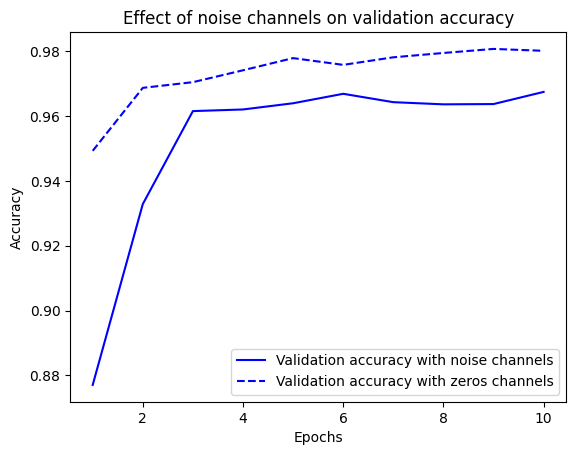

In [ ]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

The more
noise channels you add, the further accuracy will degrade.

Fitting an MNIST model with randomly shuffled labels

In [ ]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)
model = keras.Sequential([
layers.Dense(512, activation="relu"),layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
loss="sparse_categorical_crossentropy",
metrics=["accuracy"])
model.fit(train_images, random_train_labels,
epochs=100,
batch_size=128,
validation_split=0.2)

Epoch 1/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.1009 - loss: 2.3333 - val_accuracy: 0.1003 - val_loss: 2.3069
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.1198 - loss: 2.2978 - val_accuracy: 0.1052 - val_loss: 2.3104
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.1292 - loss: 2.2889 - val_accuracy: 0.1040 - val_loss: 2.3133
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.1422 - loss: 2.2750 - val_accuracy: 0.1019 - val_loss: 2.3289
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.1578 - loss: 2.2607 - val_accuracy: 0.1014 - val_loss: 2.3326
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.1722 - loss: 2.2391 - val_accuracy: 0.1042 - val_loss: 2.3457
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.1844 - loss: 2.2165 - val_accuracy: 0.1030 - val_loss: 2.3654
Epoch 8/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.2014 - loss: 2.1884 - 

More generally, the manifold hypothesis posits that all natural data lies on a low-dimensional manifold within the high-dimensional space where it is encoded. That’s a pretty
strong statement about the structure of information in the universe.

The manifold hypothesis implies that

 Machine learning models only have to fit relatively simple, low-dimensional,
highly structured subspaces within their potential input space (latent manifolds).

 Within one of these manifolds, it’s always possible to interpolate between two
inputs, that is to say, morph one into another via a continuous path along which
all points fall on the manifold.

If you work with data points that can be interpolated, you can start making sense of
points you’ve never seen before by relating them to other points that lie close on the
manifold. In other words, you can make sense of the totality of the space using only a
sample of the space. You can use interpolation to fill in the blanks

Crucially, while deep learning achieves generalization via interpolation on a
learned approximation of the data manifold, it would be a mistake to assume that
interpolation is all there is to generalization.

Humans are capable of extreme generalization, which is enabled by cognitive mechanisms other than interpolation: abstraction, symbolic models of the world, reasoning,
logic, common sense, innate priors about the world—what we generally call reason, as
opposed to intuition and pattern recognition. The latter are largely interpolative in
nature, but the former isn’t. Both are essential to intelligence.

Training an MNIST model with an incorrectly high learning rate

In [4]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
model = keras.Sequential([
layers.Dense(512, activation="relu"),
layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
loss="sparse_categorical_crossentropy",
metrics=["accuracy"])
model.fit(train_images, train_labels,
epochs=10,batch_size=128,
validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.4026 - loss: 2846.3613 - val_accuracy: 0.2455 - val_loss: 2.3150
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.2323 - loss: 2.8901 - val_accuracy: 0.2165 - val_loss: 2.6083
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.2057 - loss: 3.1903 - val_accuracy: 0.1973 - val_loss: 2.2674
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.1859 - loss: 2.4277 - val_accuracy: 0.1531 - val_loss: 2.4265
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.1836 - loss: 2.4890 - val_accuracy: 0.1836 - val_loss: 2.3144
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.1847 - loss: 2.3219 - val_accuracy: 0.1806 - val_loss: 2.1572
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.2026 - loss: 2.4290 - val_accuracy: 0.1913 - val_loss: 2.2944
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.2022 - loss: 2.4838 - val_ac

The same model with a more appropriate learning rate.Let’s try to lower the learning rate to a more reasonable value
of 1e-2.

In [6]:
model = keras.Sequential([
layers.Dense(512, activation="relu"),
layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
loss="sparse_categorical_crossentropy",
metrics=["accuracy"])
model.fit(train_images, train_labels,
epochs=10,
batch_size=128,
validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.8375 - loss: 0.8237 - val_accuracy: 0.9564 - val_loss: 0.1532
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9643 - loss: 0.1247 - val_accuracy: 0.9608 - val_loss: 0.1602
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9746 - loss: 0.0936 - val_accuracy: 0.9697 - val_loss: 0.1418
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9812 - loss: 0.0713 - val_accuracy: 0.9621 - val_loss: 0.2032
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9831 - loss: 0.0646 - val_accuracy: 0.9683 - val_loss: 0.1849
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9859 - loss: 0.0526 - val_accuracy: 0.9701 - val_loss: 0.1966
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9865 - loss: 0.0527 - val_accuracy: 0.9720 - val_loss: 0.1909
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9887 - loss: 0.0492 - val_accu

A simple logistic regression on MNIST

In [7]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
loss="sparse_categorical_crossentropy",
metrics=["accuracy"])
history_small_model = model.fit(
train_images, train_labels,
epochs=20,
batch_size=128,
validation_split=0.2)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7386 - loss: 1.0410 - val_accuracy: 0.9038 - val_loss: 0.3629
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8982 - loss: 0.3717 - val_accuracy: 0.9124 - val_loss: 0.3113
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9108 - loss: 0.3231 - val_accuracy: 0.9193 - val_loss: 0.2914
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9158 - loss: 0.3065 - val_accuracy: 0.9211 - val_loss: 0.2833
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9170 - loss: 0.2963 - val_accuracy: 0.9231 - val_loss: 0.2793
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9203 - loss: 0.2854 - val_accuracy: 0.9245 - val_loss: 0.2740
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9203 - loss: 0.2840 - val_accuracy: 0.9250 - val_loss: 0.2716
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9219 - loss: 0.2744 - val_accuracy: 0.

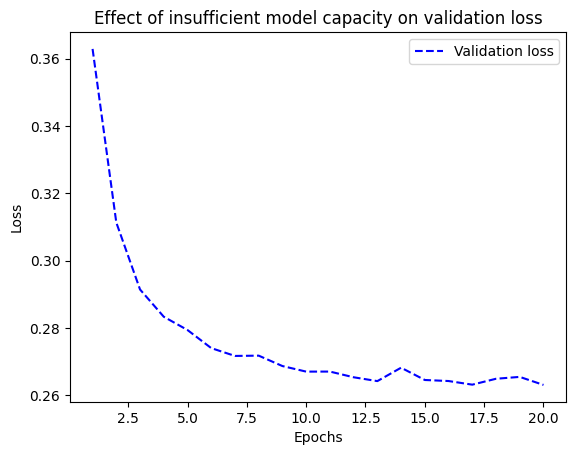

In [8]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

The validation loss goes to 0.26 and just stays there. You can fit, but
you can’t clearly overfit, even after many iterations over the training data. You’re likely
to encounter similar curves often in your career.

Remember that it should always be possible to overfit.you can’t seem to be able to overfit, it’s likely a problem with the representational
power of your model: you’re going to need a bigger model, one with more capacity,Let’s try training a bigger model, one with two intermediate layers with 96 units
each:

In [9]:
model = keras.Sequential([
layers.Dense(96, activation="relu"),
layers.Dense(96, activation="relu"),
layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
loss="sparse_categorical_crossentropy",
metrics=["accuracy"])
history_large_model = model.fit(
train_images, train_labels,
epochs=20,
batch_size=128,
validation_split=0.2)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8253 - loss: 0.6217 - val_accuracy: 0.9481 - val_loss: 0.1801
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9481 - loss: 0.1706 - val_accuracy: 0.9556 - val_loss: 0.1474
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9635 - loss: 0.1213 - val_accuracy: 0.9665 - val_loss: 0.1185
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9728 - loss: 0.0893 - val_accuracy: 0.9715 - val_loss: 0.1019
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9787 - loss: 0.0696 - val_accuracy: 0.9709 - val_loss: 0.1083
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9836 - loss: 0.0561 - val_accuracy: 0.9743 - val_loss: 0.0933
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9867 - loss: 0.0453 - val_accuracy: 0.9741 - val_loss: 0.0930
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9888 - loss: 0.0381 - val_accuracy: 0.

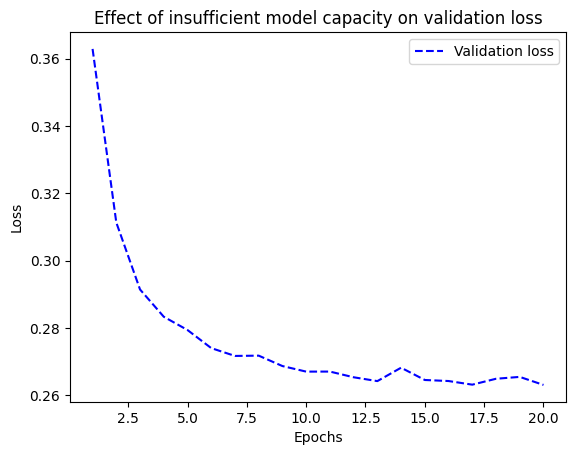

In [10]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

Once your model has shown itself to have some generalization power and to be able
to overfit, it’s time to switch your focus to maximizing generalization.If your data makes it possible to smoothly interpolate between
samples, you will be able to train a deep learning model that generalizes.If your problem is overly noisy or fundamentally discrete, like, say, list sorting, deep learning will
not help you. Deep learning is curve fitting, not magic.Spending more effort and money on data collection almost always yields a much
greater return on investment than spending the same on developing a better model.
 Make sure you have enough data. Remember that you need a dense sampling of
the input-cross-output space. More data will yield a better model. Sometimes,
problems that seem impossible at first become solvable with a larger dataset.
 Minimize labeling errors—visualize your inputs to check for anomalies, and
proofread your labels.
 Clean your data and deal with missing values (we’ll cover this in the next chapter).
 If you have many features and you aren’t sure which ones are actually useful, do
feature selection.

The general workflow for finding an appropriate model size is to start
with relatively few layers and parameters, and increase the size of the layers or add new
layers until you see diminishing returns with regard to validation loss.
Let’s try this on the movie-review classification model.

In [11]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results
train_data = vectorize_sequences(train_data)
model = keras.Sequential([
layers.Dense(16, activation="relu"),
layers.Dense(16, activation="relu"),
layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
loss="binary_crossentropy",
metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
epochs=20, batch_size=512, validation_split=0.4)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - accuracy: 0.6724 - loss: 0.6125 - val_accuracy: 0.8648 - val_loss: 0.4049
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.8932 - loss: 0.3481 - val_accuracy: 0.8777 - val_loss: 0.3267
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9213 - loss: 0.2492 - val_accuracy: 0.8733 - val_loss: 0.3146
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9324 - loss: 0.2047 - val_accuracy: 0.8901 - val_loss: 0.2745
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9461 - loss: 0.1705 - val_accuracy: 0.8891 - val_loss: 0.2754
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9602 - loss: 0.1372 - val_accuracy: 0.8807 - val_loss: 0.3027
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9645 - loss: 0.1197 - val_accuracy: 0.8844 - val_loss: 0.3008
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accurac

Version of the model with lower capacity

In [12]:
model = keras.Sequential([
layers.Dense(4, activation="relu"),
layers.Dense(4, activation="relu"),
layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
loss="binary_crossentropy",
metrics=["accuracy"])
history_smaller_model = model.fit(
train_data, train_labels,
epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.5524 - loss: 0.6777 - val_accuracy: 0.6452 - val_loss: 0.6357
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.6822 - loss: 0.6193 - val_accuracy: 0.7188 - val_loss: 0.5938
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.7538 - loss: 0.5771 - val_accuracy: 0.7195 - val_loss: 0.5637
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.7900 - loss: 0.5369 - val_accuracy: 0.8175 - val_loss: 0.5337
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.8334 - loss: 0.5052 - val_accuracy: 0.8107 - val_loss: 0.5122
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.8516 - loss: 0.4834 - val_accuracy: 0.8456 - val_loss: 0.4929
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.8746 - loss: 0.4564 - val_accuracy: 0.8594 - val_loss: 0.4776
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.8911 - loss: 0.4371 - val_accuracy: 0.8441 - v

While it is standard to work with models that are significantly overparameterized for what they’re trying to learn, there can definitely be such
a thing as too much memorization capacity. You’ll know your model is too large if it
starts overfitting right away and if its validation loss curve looks choppy with highvariance (although choppy validation metrics could also be a symptom of using an
unreliable validation process, such as a validation split that’s too small).

Version of the model with higher capacity

In [13]:
model = keras.Sequential([
layers.Dense(512, activation="relu"),
layers.Dense(512, activation="relu"),
layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
loss="binary_crossentropy",
metrics=["accuracy"])
history_larger_model = model.fit(
train_data, train_labels,
epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 13s 386ms/step - accuracy: 0.6416 - loss: 0.6595 - val_accuracy: 0.8702 - val_loss: 0.3498
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 350ms/step - accuracy: 0.8814 - loss: 0.3137 - val_accuracy: 0.8646 - val_loss: 0.3239
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 303ms/step - accuracy: 0.9043 - loss: 0.2381 - val_accuracy: 0.8884 - val_loss: 0.2737
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 330ms/step - accuracy: 0.9253 - loss: 0.1923 - val_accuracy: 0.8834 - val_loss: 0.2893
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 12s 408ms/step - accuracy: 0.9549 - loss: 0.1251 - val_accuracy: 0.8842 - val_loss: 0.2859
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 18s 324ms/step - accuracy: 0.9713 - loss: 0.0919 - val_accuracy: 0.8803 - val_loss: 0.3110
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 327ms/step - accuracy: 0.9773 - loss: 0.0753 - val_accuracy: 0.8795 - val_loss: 0.3716
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 352ms/step - accuracy: 0.9850 - loss: 0.0542 - val_accu

In Keras, weight regularization is added by passing weight regularizer instances to layers
as keyword arguments. Let’s add L2 weight regularization to our initial movie-review
classification model.

In [15]:
from tensorflow.keras import regularizers
model = keras.Sequential([
layers.Dense(16,
kernel_regularizer=regularizers.l2(0.002),
activation="relu"),
layers.Dense(16,
kernel_regularizer=regularizers.l2(0.002),
activation="relu"),
layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
loss="binary_crossentropy",
metrics=["accuracy"])
history_l2_reg = model.fit(
train_data, train_labels,
epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - accuracy: 0.7235 - loss: 0.6730 - val_accuracy: 0.8661 - val_loss: 0.4777
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.8938 - loss: 0.4224 - val_accuracy: 0.8724 - val_loss: 0.4079
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9164 - loss: 0.3409 - val_accuracy: 0.8743 - val_loss: 0.3909
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9242 - loss: 0.2969 - val_accuracy: 0.8907 - val_loss: 0.3540
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9292 - loss: 0.2773 - val_accuracy: 0.8804 - val_loss: 0.3702
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9434 - loss: 0.2539 - val_accuracy: 0.8841 - val_loss: 0.3635
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9477 - loss: 0.2432 - val_accuracy: 0.8777 - val_loss: 0.3801
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9504 - loss: 0.2336 - val_accuracy: 0.8790 - v

In the preceding listing, l2(0.002) means every coefficient in the weight matrix of
the layer will add 0.002 * weight_coefficient_value ** 2 to the total loss of the
model.


Different weight regularizers available in Keras

In [ ]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

In Keras, you can introduce dropout in a model via the Dropout layer, which is
applied to the output of the layer right before it. Let’s add two Dropout layers in the
IMDB model to see how well they do at reducing overfitting.

Adding dropout to the IMDB model

In [16]:
model = keras.Sequential([
layers.Dense(16, activation="relu"),
layers.Dropout(0.5),
layers.Dense(16, activation="relu"),
layers.Dropout(0.5),
layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
loss="binary_crossentropy",
metrics=["accuracy"])
history_dropout = model.fit(
train_data, train_labels,
epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - accuracy: 0.5585 - loss: 0.6755 - val_accuracy: 0.8259 - val_loss: 0.5932
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 0.6798 - loss: 0.6001 - val_accuracy: 0.8636 - val_loss: 0.5059
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.7337 - loss: 0.5378 - val_accuracy: 0.8760 - val_loss: 0.4447
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.7895 - loss: 0.4723 - val_accuracy: 0.8787 - val_loss: 0.3870
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.8361 - loss: 0.4221 - val_accuracy: 0.8871 - val_loss: 0.3328
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.8643 - loss: 0.3695 - val_accuracy: 0.8887 - val_loss: 0.3116
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.8870 - loss: 0.3232 - val_accuracy: 0.8892 - val_loss: 0.2832
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.8989 - loss: 0.2850 - val_accuracy: 0.8909 - v

To recap, these are the most common ways to maximize generalization and prevent
overfitting in neural networks:
 Get more training data, or better training data.
 Develop better features.
 Reduce the capacity of the model.
 Add weight regularization (for smaller models).
 Add dropout

 The purpose of a machine learning model is to generalize: to perform accurately
on never-before-seen inputs. It’s harder than it seems.
 A deep neural network achieves generalization by learning a parametric model
that can successfully interpolate between training samples—such a model can be
said to have learned the “latent manifold” of the training data. This is why deep
learning models can only make sense of inputs that are very close to what
they’ve seen during training.
 The fundamental problem in machine learning is the tension between optimization
and generalization: to attain generalization, you must first achieve a good fit to
the training data, but improving your model’s fit to the training data will inevitably start hurting generalization after a while. Every single deep learning best
practice deals with managing this tension.
 The ability of deep learning models to generalize comes from the fact that they
manage to learn to approximate the latent manifold of their data, and can thus
make sense of new inputs via interpolation.
 It’s essential to be able to accurately evaluate the generalization power of your
model while you’re developing it. You have at your disposal an array of evaluation methods, from simple holdout validation to K-fold cross-validation and
iterated K-fold cross-validation with shuffling. Remember to always keep a completely separate test set for final model evaluation, since information leaks from
your validation data to your model may have occurred.
 When you start working on a model, your goal is first to achieve a model that
has some generalization power and that can overfit. Best practices for doing
this include tuning your learning rate and batch size, leveraging better architecture priors, increasing model capacity, or simply training longer.
 As your model starts overfitting, your goal switches to improving generalization
through model regularization. You can reduce your model’s capacity, add dropout
or weight regularization, and use early stopping. And naturally, a larger or better dataset is always the number one way to help a model generalize.